In [14]:
from collections import defaultdict
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import seaborn as sns

import nltk
from wordcloud import STOPWORDS

In [15]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
x = df.target.value_counts().values
print(f"There are {x.sum():.0f} tweets in the dataset.")
print(f"{x[0]}({((x[0]/x.sum())*100):.2f}%) are Not Disaster")
print(f"{x[1]}({((x[1]/x.sum())*100):.2f}%) are Disaster")

There are 7613 tweets in the dataset.
4342(57.03%) are Not Disaster
3271(42.97%) are Disaster


In [17]:
x = df["text"].str.len().describe()["max"]
print(f"The tweet max length is {x:.0f} characters")

The tweet max length is 157 characters


In [18]:
# Count the number of missing values
df.isnull().sum(axis=0)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [19]:
counts = df[["target", "keyword","text"]].groupby(["keyword","target"]).count().reset_index()
counts = counts.rename(columns={"text":"counts"})

In [20]:
counts = pd.crosstab(df.keyword, [df.target])
counts["ratio"] = counts[1]/counts[0]
counts = counts.sort_values(by="ratio", ascending=True)

In [21]:
df[(df["target"]==1)]["keyword"].value_counts().keys()

Index(['derailment', 'wreckage', 'outbreak', 'debris', 'oil%20spill',
       'typhoon', 'evacuated', 'suicide%20bombing', 'rescuers',
       'suicide%20bomb',
       ...
       'blew%20up', 'inundation', 'threat', 'screaming', 'body%20bags',
       'blazing', 'epicentre', 'body%20bag', 'electrocute', 'ruin'],
      dtype='object', name='keyword', length=220)

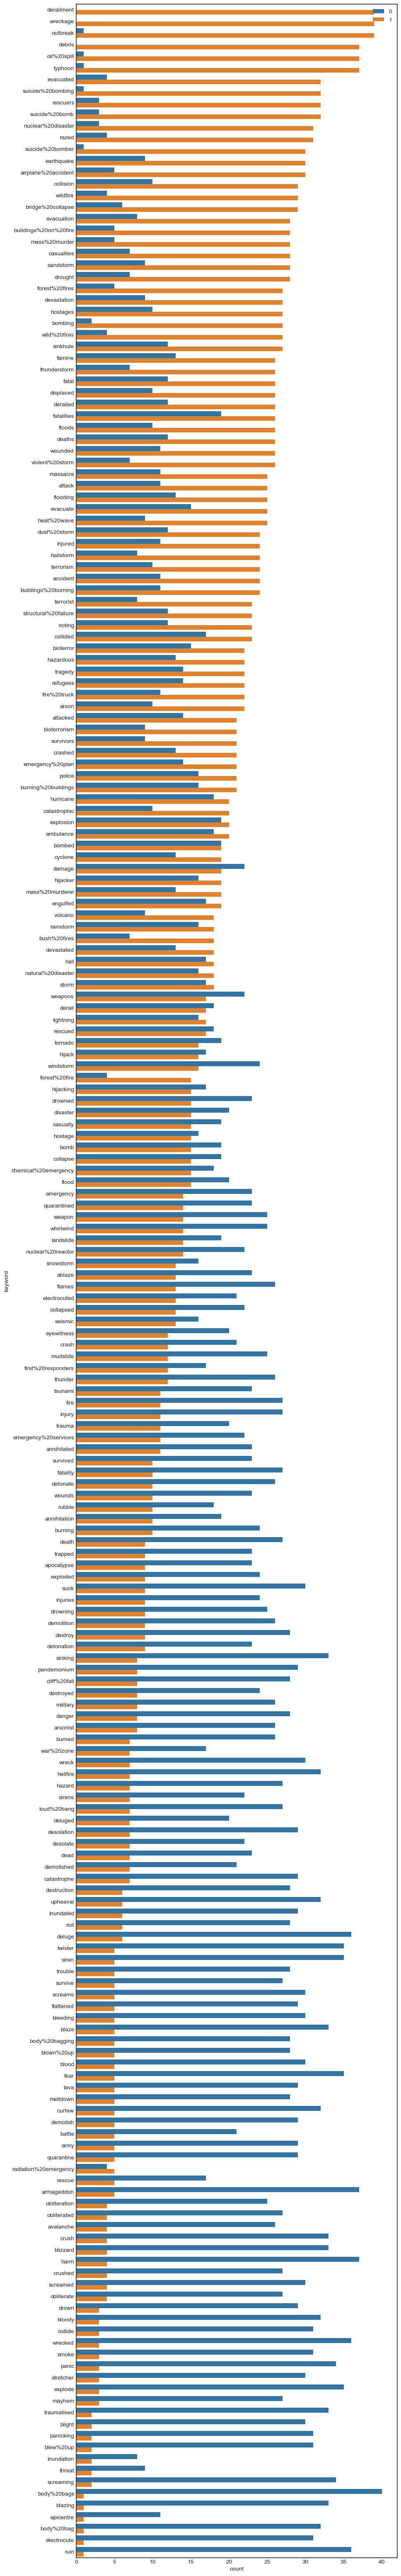

In [22]:
order = df[(df["target"]==1)]["keyword"].value_counts().keys()
fig = plt.figure(figsize=(10, 80), dpi=100)
sns.countplot(df, y = "keyword", hue="target", order = order)
plt.legend(loc=1)
plt.show()

In [23]:
def top_ngrams(corpus:str, n_ngrams:int, top_n:int=10):
    # remove STOPWORDS from corpus
    corpus =  [x.lower() for x in corpus.split() if x.lower() not in STOPWORDS]
    # Generate grams
    ngrams = nltk.ngrams(corpus, n_ngrams)
    ngrams = [' '.join(ngram) for ngram in ngrams]

    # Count grams
    if top_n >= 0:
        ngrams_counts = (pd.Series(ngrams).value_counts())[:top_n]
    elif top_n < 0:
        ngrams_counts = (pd.Series(ngrams).value_counts())[top_n:]
        
    return ngrams_counts

In [24]:
def plot_top_ngrams(n_ngrams:int, top_n:int=10):
    
    fig, ax =  plt.subplots(1, 2, figsize=(12,3))
    
    for t, name, color in zip([0,1], ["Not Disaster", "Disaster"], ["green", "red"]):
    
        corpus = " ".join(df[df["target"]==t]["text"].values)
        ngrams_counts = top_ngrams(corpus, n_ngrams, top_n)
        ngrams_counts = ngrams_counts.sort_values()
     
        ax[t].barh(ngrams_counts.index, ngrams_counts, color=color)
        ax[t].set_ylabel('ngram')
        ax[t].set_xlabel('Number of Occurances')
        ax[t].set_title(name)
    
    plt.suptitle(f"Top {top_n} {n_ngrams}-grams")

    plt.tight_layout()
    plt.show()

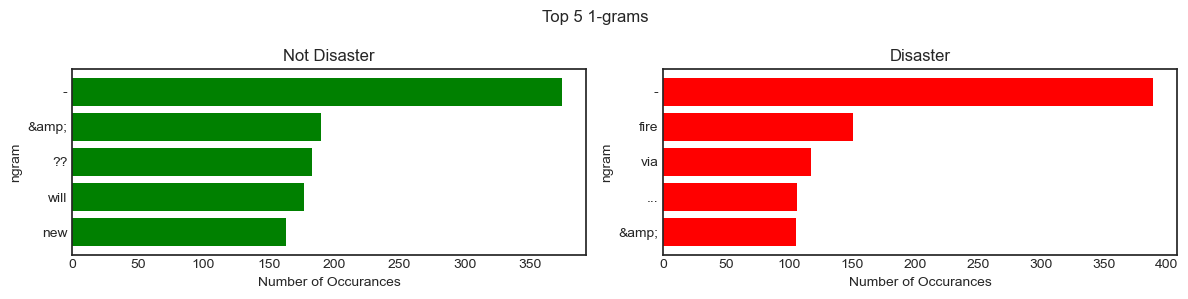

C:\Users\joanp\AppData\Local\Temp\ipykernel_22872\2019879634.py:18: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.tight_layout()
c:\Users\joanp\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


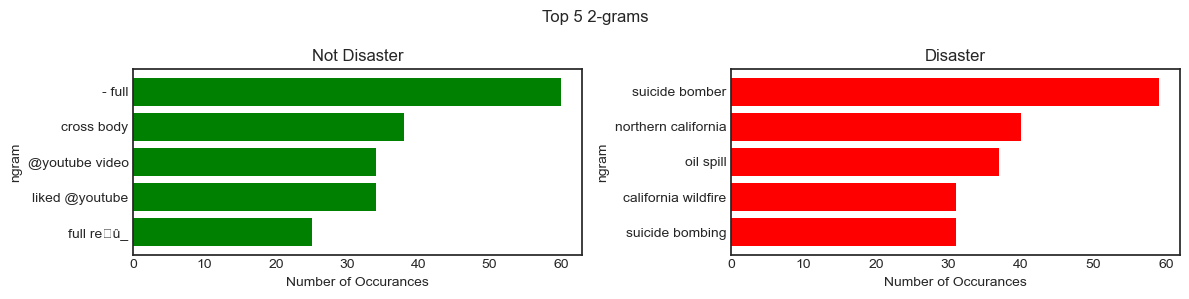

C:\Users\joanp\AppData\Local\Temp\ipykernel_22872\2019879634.py:18: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.tight_layout()
c:\Users\joanp\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


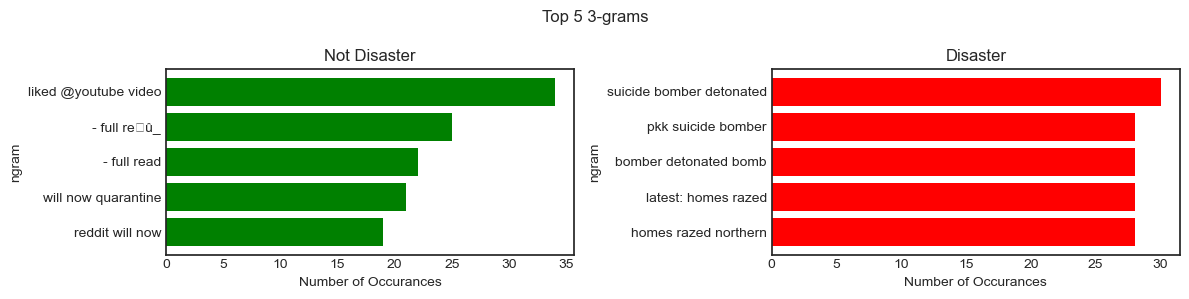

In [25]:
for n in range(1,4):
    plot_top_ngrams(n, 5)

In [30]:
df.values.shape

(7613, 5)